In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import random as rnd
import scipy.stats as sps
import scipy.optimize as spo
import csv as csv
import datetime as dt

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session


mean, variance is 1.00009492889 0.166745246368
mean, variance is 1.5002516947 0.250071227165
mean, variance is 2.50016759506 0.416360784599
mean, variance is 4.99985272188 0.832292056915


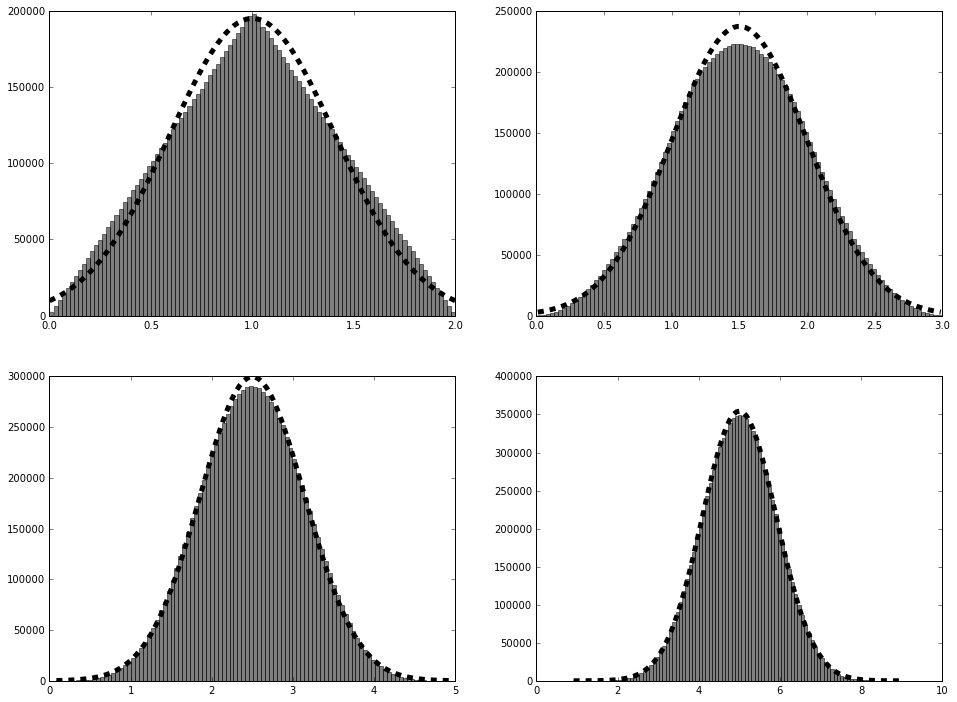

In [27]:
#Central Limit Theorem with uniform distribution:
nRands =    [2,3,5,10];

nVals=10000000;
f,axarr = plt.subplots(2,2)
print axarr[0]
for j,(nRand,ax) in enumerate(zip(nRands,axarr.reshape(-1))):
    
    randSum = np.zeros(nVals);
    for i in range(nRand):
        randSum+=sps.uniform.rvs(size=nVals);
    
    #finding the mean and variance is easy: 
    meanSum = randSum.mean()
    varSum  = randSum.var()
    print "mean, variance is" ,meanSum, varSum
    n,bins,patches=ax.hist(randSum,bins=100,facecolor='black',alpha=0.5);
    xs=np.linspace(bins[0],bins[-1],100);
    #pdf = sps.norm.pdf(xs,loc=popt[0],scale=popt[1])*(bins[1]-bins[0])*nVals;
    pdf = sps.norm.pdf(xs,loc=meanSum,scale=np.sqrt(varSum))*(bins[1]-bins[0])*nVals;
    ax.plot(xs,pdf,'k--',linewidth=5);
plt.show()

mean, variance is 0.587535368782 8.95114945542
mean, variance is 1.20493039291 17.6964231645
mean, variance is 2.97343418485 43.921573524
mean, variance is 599.930416686 8804.30466337


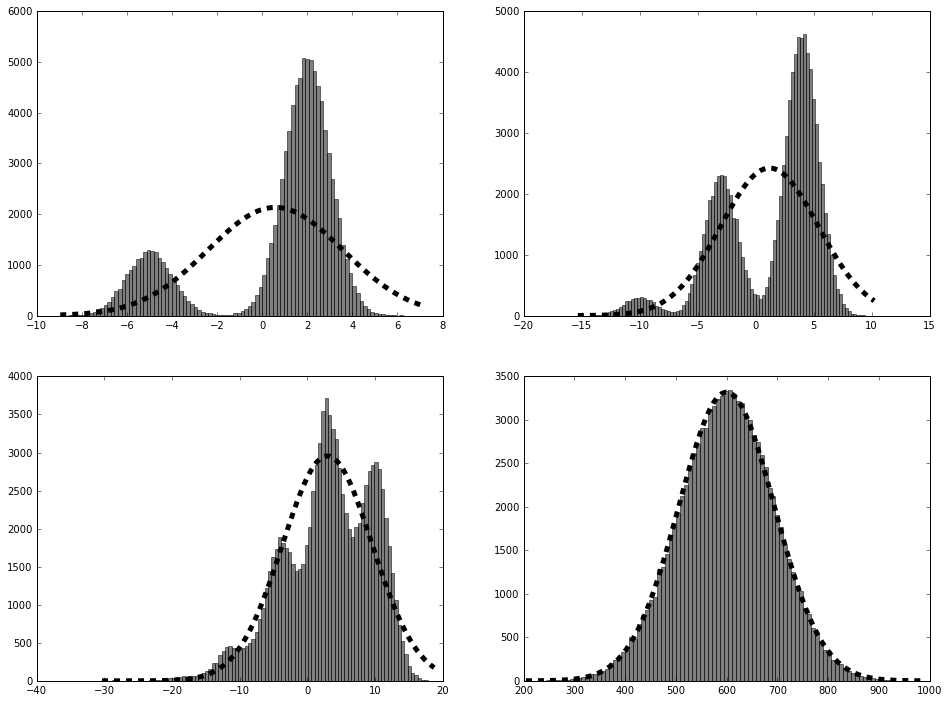

In [46]:
#Central Limit Theorem with bimodal distribution:
nRands =    [1,2,5,1000];
nVals=100000;

mu1=-5
mu2=2
alpha=0.2

poisson=False

f,axarr = plt.subplots(2,2)
print axarr[0]
for j,(nRand,ax) in enumerate(zip(nRands,axarr.reshape(-1))):
    
    randSum = np.zeros(nVals);
    for i in range(nRand):
        nr1 = sps.poisson.rvs(alpha*nVals);
        if (nVals<nr1):
            nr1=nVals;
        
        r1 = sps.norm.rvs(loc=mu1,size=nr1);
        r2 = sps.norm.rvs(loc=mu2,size=nVals-nr1)
        if poisson:
            r1 = sps.poisson.rvs(abs(mu1),size=nr1);
            r2 = sps.poisson.rvs(abs(mu2),size=nVals-nr1);
        rtot = np.concatenate([r1,r2])
        np.random.shuffle(rtot)
        randSum+=rtot
        
    
    #finding the mean and variance is easy: 
    meanSum = randSum.mean()
    varSum  = randSum.var()
    print "mean, variance is" ,meanSum, varSum
    n,bins,patches=ax.hist(randSum,bins=100,facecolor='black',alpha=0.5);
    xs=np.linspace(bins[0],bins[-1],100);
    #pdf = sps.norm.pdf(xs,loc=popt[0],scale=popt[1])*(bins[1]-bins[0])*nVals;
    pdf = sps.norm.pdf(xs,loc=meanSum,scale=np.sqrt(varSum))*(bins[1]-bins[0])*nVals;
    ax.plot(xs,pdf,'k--',linewidth=5);
plt.show()